In [1]:
# Importing required libraries 

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import pandas as pd 
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from IPython.display import display
from matplotlib.pyplot import figure, show
from numpy import arange, sin, pi
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC



/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Results on Dog Data using OutcomeType Label:

# Reading our Training Set:

In [2]:
animal_df = pd.read_csv('train.csv')

# Ignoring Rows with NaN values (to avoid any future issues with implementations)
# animal_df.dropna(inplace= True)


# print(animal_df.isnull().sum())
animal_df.head()

# (26729, 10) --> Without ignoring rows with NaNs

# (6979, 10) --> Ignoring rows with NaNs

# (26729, 6) --> Ingoring columns with NaNs


# animal_df.shape


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


# Removing Columns we do not need:

In [3]:
animal_df.drop(['AnimalID','Name','OutcomeSubtype'], axis=1, inplace=True)


animal_df.dropna(inplace= True)

# animal_df.shape

# (26710, 7) --> Size of Data when ignoring columns with most NaNs but also ignoring rows with NaNs thus 
# we're able to keep most of our data 

# print(animal_df.isnull().sum())

# df = df[~df['your column'].isin(['list of strings'])]


# animal_df.shape
animal_df.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,2013-10-13 12:44:00,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,2014-07-11 19:09:00,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


# Will be setting up our Data and  Predictions based on DOGS only:

In [4]:
# Ignoring every row that contains 'Cat'

animal_df = animal_df[~animal_df['AnimalType'].isin(['Cat'])]

# animal_df.shape

# (15593, 7) --> size of data when ignoring rows that contain 'Cat'

animal_df.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2,2015-01-31 12:28:00,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
4,2013-11-15 12:52:00,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,2014-04-25 13:04:00,Transfer,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
8,2014-02-04 17:17:00,Adoption,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White


# Converting our Label Vector from Categorical to numerical:

In [5]:
# Giving numerical values to our label
def categorical_to_numeric(x):
    if x == 'Return_to_owner':
        return 0
    elif x == 'Euthanasia':
        return 1
    elif x == 'Adoption':
        return 2
    elif x == 'Transfer':
        return 3
    
animal_df['OutcomeType'] = animal_df['OutcomeType'].apply(categorical_to_numeric).astype(np.float32)


animal_df.dropna(inplace= True)

# animal_df.shape

# (26513, 7) --> Size of Data when removing rows with NaNs from our OutCometype Column

# print(animal_df.isnull().sum())

animal_df.head()

,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,2014-02-12 18:22:00,0.0,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
2,2015-01-31 12:28:00,2.0,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
4,2013-11-15 12:52:00,3.0,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,2014-04-25 13:04:00,3.0,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
8,2014-02-04 17:17:00,2.0,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White


# Converting our DateTime Column to Year, Month, Day:

In [6]:
datetime = pd.to_datetime(animal_df['DateTime']).dt
animal_df['Year'] = datetime.year
animal_df['Month'] = datetime.month
animal_df['Day'] = datetime.day
animal_df.drop(['DateTime'], axis=1, inplace=True)

animal_df.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
0,0.0,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12
2,2.0,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31
4,3.0,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15
5,3.0,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,2014,4,25
8,2.0,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,2014,2,4


# Converting AgeUponOutcome to total number of weeks:

In [7]:
def change_year_month_to_weeks(x):
    count, parse_age = x.split(" ")
    if parse_age == 'month':
        return int(4)
    elif parse_age == 'months':
        return 4 * int(count)
    elif parse_age == 'year':
        return int(52)
    elif parse_age == 'years':
        return 52 * int(count)
    elif parse_age == 'week':
        return int(count)
    elif parse_age == 'weeks':
        return int(count)
    
animal_df['AgeuponOutcome'] = animal_df['AgeuponOutcome'].apply(change_year_month_to_weeks).astype(np.float32)

animal_df.head()

,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day
0,0.0,Dog,Neutered Male,52.0,Shetland Sheepdog Mix,Brown/White,2014,2,12
2,2.0,Dog,Neutered Male,104.0,Pit Bull Mix,Blue/White,2015,1,31
4,3.0,Dog,Neutered Male,104.0,Lhasa Apso/Miniature Poodle,Tan,2013,11,15
5,3.0,Dog,Intact Female,4.0,Cairn Terrier/Chihuahua Shorthair,Black/Tan,2014,4,25
8,2.0,Dog,Spayed Female,20.0,American Pit Bull Terrier Mix,Red/White,2014,2,4


# Using One-Hot Encoding on our categorical features:

In [8]:
#Used OneHotEncoding on Non-Numerical Features

list_nonNumerical = ['AnimalType','Breed','Color','SexuponOutcome']

for column in list_nonNumerical:
    dummies = pd.get_dummies(animal_df[column])
    animal_df[dummies.columns] = dummies
    
oneHotEncoding_features = animal_df

# (26729, 31081) --> Without Ignoring Rows with NaNs (After OneHotEncoding)

# (6979, 10211) --> Ignoring Rows with NaNs (After OneHotEncoding)

# (26729, 1755) --> Ignoring Columns with NaNs (After OneHotEncoding)


# #get first 5 rows of new table

oneHotEncoding_features.head()

# getnewFeatures_X.shape


,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Year,Month,Day,Dog,...,Yellow Brindle/Tan,Yellow Brindle/White,Yellow/Black,Yellow/White,Yellow/Yellow,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,0.0,Dog,Neutered Male,52.0,Shetland Sheepdog Mix,Brown/White,2014,2,12,1,...,0,0,0,0,0,0,0,1,0,0
2,2.0,Dog,Neutered Male,104.0,Pit Bull Mix,Blue/White,2015,1,31,1,...,0,0,0,0,0,0,0,1,0,0
4,3.0,Dog,Neutered Male,104.0,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,1,...,0,0,0,0,0,0,0,1,0,0
5,3.0,Dog,Intact Female,4.0,Cairn Terrier/Chihuahua Shorthair,Black/Tan,2014,4,25,1,...,0,0,0,0,0,1,0,0,0,0
8,2.0,Dog,Spayed Female,20.0,American Pit Bull Terrier Mix,Red/White,2014,2,4,1,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Checking the NaN values after doing OneHotEncoding

print(oneHotEncoding_features.isnull().sum())

OutcomeType                              0
AnimalType                               0
SexuponOutcome                           0
AgeuponOutcome                          76
Breed                                    0
Color                                    0
Year                                     0
Month                                    0
Day                                      0
Dog                                      0
Affenpinscher Mix                        0
Afghan Hound Mix                         0
Airedale Terrier                         0
Airedale Terrier Mix                     0
Airedale Terrier/Labrador Retriever      0
Airedale Terrier/Miniature Schnauzer     0
Akita                                    0
Akita Mix                                0
Akita/Australian Cattle Dog              0
Akita/Chow Chow                          0
Akita/German Shepherd                    0
Akita/Labrador Retriever                 0
Akita/Pit Bull                           0
Akita/Siber

In [10]:
# Remove Remaining NaN values:

oneHotEncoding_features.dropna(inplace = True)


print(oneHotEncoding_features.isnull().sum())

# oneHotEncoding_features.shape

# (26137, 1761) --> size of Data after oneHotEncoding and ignoring remaining NaNs in our data
# (15467, 1596) --> size of Data after doing oneHotEncoding only Dog Data (also includes removing NaNs where necessary)

OutcomeType                             0
AnimalType                              0
SexuponOutcome                          0
AgeuponOutcome                          0
Breed                                   0
Color                                   0
Year                                    0
Month                                   0
Day                                     0
Dog                                     0
Affenpinscher Mix                       0
Afghan Hound Mix                        0
Airedale Terrier                        0
Airedale Terrier Mix                    0
Airedale Terrier/Labrador Retriever     0
Airedale Terrier/Miniature Schnauzer    0
Akita                                   0
Akita Mix                               0
Akita/Australian Cattle Dog             0
Akita/Chow Chow                         0
Akita/German Shepherd                   0
Akita/Labrador Retriever                0
Akita/Pit Bull                          0
Akita/Siberian Husky              

# Building our Label Vector:

In [11]:
y = oneHotEncoding_features['OutcomeType']

y.head()

0    0.0
2    2.0
4    3.0
5    3.0
8    2.0
Name: OutcomeType, dtype: float32

# After doing OneHotEncoding, now will drop non-numerical columns and keep Number Columns. This will allow us to build our Feature Matrix:

In [12]:
# Dropping Non-numerical columns and our label column:
oneHotEncoding_features.drop(['SexuponOutcome','OutcomeType','AnimalType','Breed','Color'], axis=1, inplace=True)

X = oneHotEncoding_features

X.head()

# print(getnewFeatures_X.isnull().sum())

# getnewFeatures_X.shape

,AgeuponOutcome,Year,Month,Day,Dog,Affenpinscher Mix,Afghan Hound Mix,Airedale Terrier,Airedale Terrier Mix,Airedale Terrier/Labrador Retriever,...,Yellow Brindle/Tan,Yellow Brindle/White,Yellow/Black,Yellow/White,Yellow/Yellow,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,52.0,2014,2,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,104.0,2015,1,31,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,104.0,2013,11,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,4.0,2014,4,25,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,20.0,2014,2,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting our data into testing and training: 

In [13]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

print("X_Train size: " + str(X_train.shape))
print("y_train size: " + str(y_train.shape))
print("X_Test size: " + str(X_test.shape))
print("y_test size: " + str(y_test.shape))

X_Train size: (12373, 1591)
y_train size: (12373,)
X_Test size: (3094, 1591)
y_test size: (3094,)


# Using Random Forest Classifier:

In [14]:
#Instantiated Random Forest Classifier
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

In [15]:
# Training on the training set:
my_RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [16]:
# Testing on the testing set:
y_predict_rf = my_RandomForest.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_predict_rf)

print("Random Forest accuracy: " + str(rf_accuracy))

Random Forest accuracy: 0.52617970265


# Using Log Loss for Random Forest:

In [17]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_RandomForest.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(Random Forest): " + str(logloss_score))

Log Loss score(Random Forest): 2.08722324417


Text(0.5,1,'log(x)')

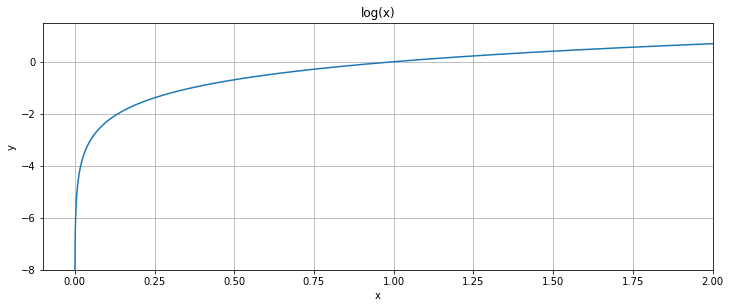

In [18]:
t = arange(1e-5, 5.0, 0.00001)

graph = figure(1, figsize=(12,10))

axis = graph.add_subplot(211)

axis.plot(t, np.log(t))

axis.grid(True)

axis.set_ylim(-8,1.5)
axis.set_xlim(-0.1,2)
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_title('log(x)')

# Using KNN Classifier:

In [19]:
# Testing out KNN Classifier on Dog Data up 10 neighbors:
for i in range(1, 11):
    knn_animal = KNeighborsClassifier(n_neighbors = i)
    knn_animal.fit(X_train, y_train)
    y_predict_knn = knn_animal.predict(X_test)

    knn_accuracy = accuracy_score(y_test, y_predict_knn)

    print("KNN Accuracy for  " + str(i) + " neighbors " + str(knn_accuracy))

KNN Accuracy for  1 neighbors 0.439237233355
KNN Accuracy for  2 neighbors 0.446347769877
KNN Accuracy for  3 neighbors 0.459922430511
KNN Accuracy for  4 neighbors 0.459922430511
KNN Accuracy for  5 neighbors 0.456043956044
KNN Accuracy for  6 neighbors 0.459922430511
KNN Accuracy for  7 neighbors 0.466063348416
KNN Accuracy for  8 neighbors 0.471881060116
KNN Accuracy for  9 neighbors 0.467356173239
KNN Accuracy for  10 neighbors 0.469295410472


# Using Log Loss for KNN:

In [20]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = knn_animal.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(KNN): " + str(logloss_score))

Log Loss score(KNN): 3.17473115096


# Using Decision Tree Classifier:

In [21]:
decision_tree_animal = DecisionTreeClassifier()
decision_tree_animal.fit(X_train, y_train)
y_predict_decision_tree = decision_tree_animal.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_predict_decision_tree)

print("Decision Tree Accuracy: " + str(dt_accuracy))

Decision Tree Accuracy: 0.476405946994


# Using Log Loss for Decision Tree:

In [22]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = decision_tree_animal.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(Decision Tree): " + str(logloss_score))

Log Loss score(Decision Tree): 18.0517045958


# Using AdaBoost Classifier:

In [23]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 19,random_state=2)
my_AdaBoost.fit(X_train, y_train)
y_predict_ada = my_AdaBoost.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

# calculating the final accuracy of AdaBoost Classifier
print("AdaBoost Classifier Accuracy: " + str(score_ada))

AdaBoost Classifier Accuracy: 0.536199095023


# Using Log Loss for AdaBoost:

In [24]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_AdaBoost.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(AdaBoost): " + str(logloss_score))

Log Loss score(AdaBoost): 1.33525670334


# Using ANN Classifier (1 hidden Layer):

In [25]:
my_ANN = MLPClassifier(hidden_layer_sizes=(100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)

print("ANN Accuracy: " + str(score_ann))

ANN Accuracy: 0.478345184228


# Using Log Loss for ANN (1 hidden Layer):

In [26]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_ANN.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(ANN[1 hidden Layer]): " + str(logloss_score))

Log Loss score(ANN[1 hidden Layer]): 1.16478132219


# Using ANN Classifier (2 hidden Layers):

In [27]:
my_ANN = MLPClassifier(hidden_layer_sizes=(100,100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)

print("ANN Accuracy: " + str(score_ann))

ANN Accuracy: 0.478345184228


# Using Log Loss for ANN (2 hidden Layers):

In [28]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_ANN.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(ANN[2 hidden Layer]): " + str(logloss_score))

Log Loss score(ANN[2 hidden Layer]): 1.17115402796


# Using ANN Classifier (3 hidden Layers):

In [29]:
my_ANN = MLPClassifier(hidden_layer_sizes=(100,100,100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)

print("ANN Accuracy: " + str(score_ann))

ANN Accuracy: 0.462831286361


# Using Log Loss for ANN (3 hidden layers):

In [30]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_ANN.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(ANN[3 hidden Layer]): " + str(logloss_score))

Log Loss score(ANN[3 hidden Layer]): 1.17151032207


# Using non-Linear SVM classifier:

In [36]:
# Instantiating Non_Linear SVM
my_nonLinear_SVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

my_nonLinear_SVM.fit (X_train, y_train)

# Testing on the testing set:
y_predict_nlsvm = my_nonLinear_SVM.predict(X_test)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_nlsvm = accuracy_score(y_test, y_predict_nlsvm)

print("Accuracy of Non-Linear SVM: " + str(score_nlsvm))

Accuracy of Non-Linear SVM: 0.478345184228


# Using Log Loss for non-Linear SVM:

In [37]:
# Dont display Numpy in scientific notation
# np.set_printoptions(precision=4)
# np.set_printoptions(suppress=True)

get_prob = my_nonLinear_SVM.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(non-Linear SVM): " + str(logloss_score))

Log Loss score(non-Linear SVM): 1.12792485095


# Using PCA on Dog Data:

In [42]:
# Setting up PCA on data after OneHotEncoding:

#Used the PCA Algorithm to reduce our 
n = 50

my_pca = PCA(n_components = n)

X_PCA = my_pca.fit_transform(X)

#Stored my result from PCA into a new DataFrame
X_2 = pd.DataFrame(X_PCA)

X_2.head()

# X_2.shape

# (15467, 50) --> size of Data for Dog Data only after reducing features

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-91.754224,-3.795850,4.625239,0.841289,-0.694537,-0.178353,0.033317,-0.168338,-0.112089,0.024919,...,-0.011131,-0.011300,0.002361,-0.004711,-0.011139,0.000853,-0.008344,0.012540,-0.002467,-0.012254
1,-39.783853,15.265818,6.004750,-0.078357,-0.645983,0.097122,0.797248,-0.564138,0.180216,-0.034278,...,-0.001792,-0.019035,-0.001651,-0.007239,-0.003399,0.003283,-0.001898,-0.027285,-0.012047,-0.002424
2,-39.761694,-0.567374,-4.392167,1.028022,-0.691298,-0.197107,-0.103988,-0.098608,-0.062141,-0.011025,...,-0.004486,-0.015367,0.003937,-0.011090,-0.008024,-0.015942,-0.010050,0.016338,-0.016930,-0.008499
3,-139.775297,9.157861,2.855619,0.686083,0.051628,0.646433,-0.220372,0.088791,0.040807,0.799936,...,0.002255,-0.006573,0.001816,-0.015421,0.004452,-0.023300,-0.019484,0.012299,-0.002333,0.000941
4,-123.741620,-11.847137,4.504239,0.860546,0.708056,-0.242425,-0.002378,-0.068847,-0.136267,-0.001498,...,-0.030156,-0.033901,0.007712,-0.013811,0.029639,0.049495,-0.027809,0.062747,-0.000613,0.011272


# Splitting Data into Training and Testing :

In [43]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.20, random_state=2)

print("X_Train size: " + str(X_train.shape))
print("y_train size: " + str(y_train.shape))
print("X_Test size: " + str(X_test.shape))
print("y_test size: " + str(y_test.shape))

X_Train size: (12373, 50)
y_train size: (12373,)
X_Test size: (3094, 50)
y_test size: (3094,)


# PCA: Using Random Forest Classifier

In [69]:
#Instantiated Random Forest Classifier
my_RandomForest_PCA = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

# Training on the training set:
my_RandomForest_PCA.fit(X_train, y_train)

# Testing on the testing set:
y_predict_rf_PCA = my_RandomForest_PCA.predict(X_test)

rf_accuracy_PCA = accuracy_score(y_test, y_predict_rf_PCA)

print("Random Forest accuracy(PCA): " + str(rf_accuracy_PCA))

Random Forest accuracy(PCA): 0.521978021978


# PCA: Using Log Loss for Random Forest Classifier

In [70]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_RandomForest_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(Random Forest Classifier): " + str(logloss_score))

Log Loss score(Random Forest Classifier): 2.05847352647


# PCA: Using KNN Classifier:

In [71]:
# Testing out KNN Classifier on Dog Data up 10 neighbors:
for i in range(1, 11):
    knn_animal_PCA = KNeighborsClassifier(n_neighbors = i)
    knn_animal_PCA.fit(X_train, y_train)
    y_predict_knn_PCA = knn_animal_PCA.predict(X_test)

    knn_accuracy_PCA = accuracy_score(y_test, y_predict_knn_PCA)

    print("KNN Accuracy(PCA) for  " + str(i) + " neighbors " + str(knn_accuracy_PCA))

KNN Accuracy(PCA) for  1 neighbors 0.430187459599
KNN Accuracy(PCA) for  2 neighbors 0.441822882999
KNN Accuracy(PCA) for  3 neighbors 0.452811893988
KNN Accuracy(PCA) for  4 neighbors 0.467032967033
KNN Accuracy(PCA) for  5 neighbors 0.46800258565
KNN Accuracy(PCA) for  6 neighbors 0.466386554622
KNN Accuracy(PCA) for  7 neighbors 0.473497091144
KNN Accuracy(PCA) for  8 neighbors 0.472527472527
KNN Accuracy(PCA) for  9 neighbors 0.473497091144
KNN Accuracy(PCA) for  10 neighbors 0.468648998061


# PCA: Using Log Loss for KNN

In [72]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = knn_animal_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(KNN): " + str(logloss_score))

Log Loss score(KNN): 3.16090151452


# PCA: Using Decision Tree Classifier:

In [73]:
decision_tree_animal_PCA = DecisionTreeClassifier()
decision_tree_animal_PCA.fit(X_train, y_train)
y_predict_decision_tree = decision_tree_animal_PCA.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_predict_decision_tree)

print("Decision Tree Accuracy(PCA): " + str(dt_accuracy))

Decision Tree Accuracy(PCA): 0.436005171299


# PCA: Using Log Loss for Decision Tree

In [74]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = decision_tree_animal_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(Decision Tree): " + str(logloss_score))

Log Loss score(Decision Tree): 19.4473219831


# PCA: Using AdaBoost Classifier

In [75]:
my_AdaBoost_PCA = AdaBoostClassifier(n_estimators = 19,random_state=2)
my_AdaBoost_PCA.fit(X_train, y_train)
y_predict_ada = my_AdaBoost_PCA.predict(X_test)
score_ada = accuracy_score(y_test, y_predict_ada)

# calculating the final accuracy of AdaBoost Classifier
print("AdaBoost Classifier Accuracy(PCA): " + str(score_ada))

AdaBoost Classifier Accuracy(PCA): 0.537491919845


# PCA: Using Log Loss for AdaBoost Classifier

In [76]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_AdaBoost_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(AdaBoost): " + str(logloss_score))

Log Loss score(AdaBoost): 1.33161022416


# PCA: Using ANN (1 hidden layer)

In [77]:
my_ANN_PCA = MLPClassifier(hidden_layer_sizes=(100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN_PCA.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann_PCA = my_ANN_PCA.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann_PCA)

print("ANN Accuracy(PCA): " + str(score_ann))

ANN Accuracy(PCA): 0.553005817712


# PCA: Using Log Loss for ANN(1 hidden layer)

In [78]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_ANN_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(ANN[1 hidden later]): " + str(logloss_score))

Log Loss score(ANN[1 hidden later]): 1.03532315485


# PCA: Using ANN (2 hidden layers)

In [79]:
my_ANN_PCA = MLPClassifier(hidden_layer_sizes=(100,100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN_PCA.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann_PCA = my_ANN_PCA.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann_PCA)

print("ANN Accuracy(PCA): " + str(score_ann))

ANN Accuracy(PCA): 0.558177117001


# PCA: Using Log Loss for ANN (2 hidden layers)

In [80]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_ANN_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(ANN[2 hidden later]): " + str(logloss_score))

Log Loss score(ANN[2 hidden later]): 1.02825492759


# PCA: Using ANN (3 hidden layers)

In [81]:
my_ANN_PCA = MLPClassifier(hidden_layer_sizes=(100,100,100,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

# Training on Training set
my_ANN_PCA.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann_PCA = my_ANN_PCA.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann_PCA)

print("ANN Accuracy(PCA): " + str(score_ann))

ANN Accuracy(PCA): 0.549450549451


# PCA: Using Log Loss for ANN (3 hidden layers)

In [82]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_ANN_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(ANN[3 hidden later]): " + str(logloss_score))

Log Loss score(ANN[3 hidden later]): 1.03431733155


# PCA: Using non-Linear SVM Classifier

In [83]:
# Instantiating Non_Linear SVM
my_nonLinear_SVM_PCA = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1, probability=True)

my_nonLinear_SVM_PCA.fit (X_train, y_train)

# Testing on the testing set:
y_predict_nlsvm = my_nonLinear_SVM_PCA.predict(X_test)

# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_nlsvm = accuracy_score(y_test, y_predict_nlsvm)

print("Accuracy of Non-Linear SVM(PCA): " + str(score_nlsvm))

Accuracy of Non-Linear SVM(PCA): 0.478345184228


# PCA: Using Log Loss for non-Linear SVM

In [84]:
# Dont display Numpy in scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

get_prob = my_nonLinear_SVM_PCA.predict_proba(X_test)

logloss_score = metrics.log_loss(y_test, get_prob)

print("Log Loss score(non-Linear SVM): " + str(logloss_score))

Log Loss score(non-Linear SVM): 1.12818468298
